In [1]:
import python_functions_sp as pfsp
import warnings
warnings.filterwarnings("ignore")
import sqlalchemy
import psycopg2
import sql_functions_sp as sfsp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

### Getting the right data into one dataframe ###

#### Getting life expectancy, gross national income, GINI, % not enrolled in school, educational levels from hfa_eduHealth ####

In [2]:
schema = 'capstone_health_education'
table = 'hfa_eduHealth'

sql_query = f'SELECT * FROM {schema}."{table}";'
hfa_eduHealth= sfsp.get_dataframe(sql_query)

In [ ]:
hfa_eduHealth

In [ ]:
hfa_eduHealth.info()

In [ ]:
hfa_eduHealth.isnull()

In [3]:
hfa_eduHealth_rec = hfa_eduHealth[['continent_region', 'HFA_43', 'HFA_32','HFA_618', 'HFA_40', 'HFA_41', 'HFA_39', 'HFA_617' ]]

In [ ]:
hfa_eduHealth_rec.info()

In [ ]:
hfa_eduHealth_rec.isnull().sum()

In [4]:
hfa_eduHealth_rec.dropna(inplace=True)

In [5]:
hfa_eduHealth_rec = hfa_eduHealth_rec[hfa_eduHealth_rec['continent_region'].isin(['South Europe','West Europe', 'East Europe', 'North Europe'])]

In [ ]:
hfa_eduHealth_rec.info()

In [ ]:
hfa_eduHealth_rec['continent_region'].value_counts()

In [ ]:
hfa_eduHealth_rec

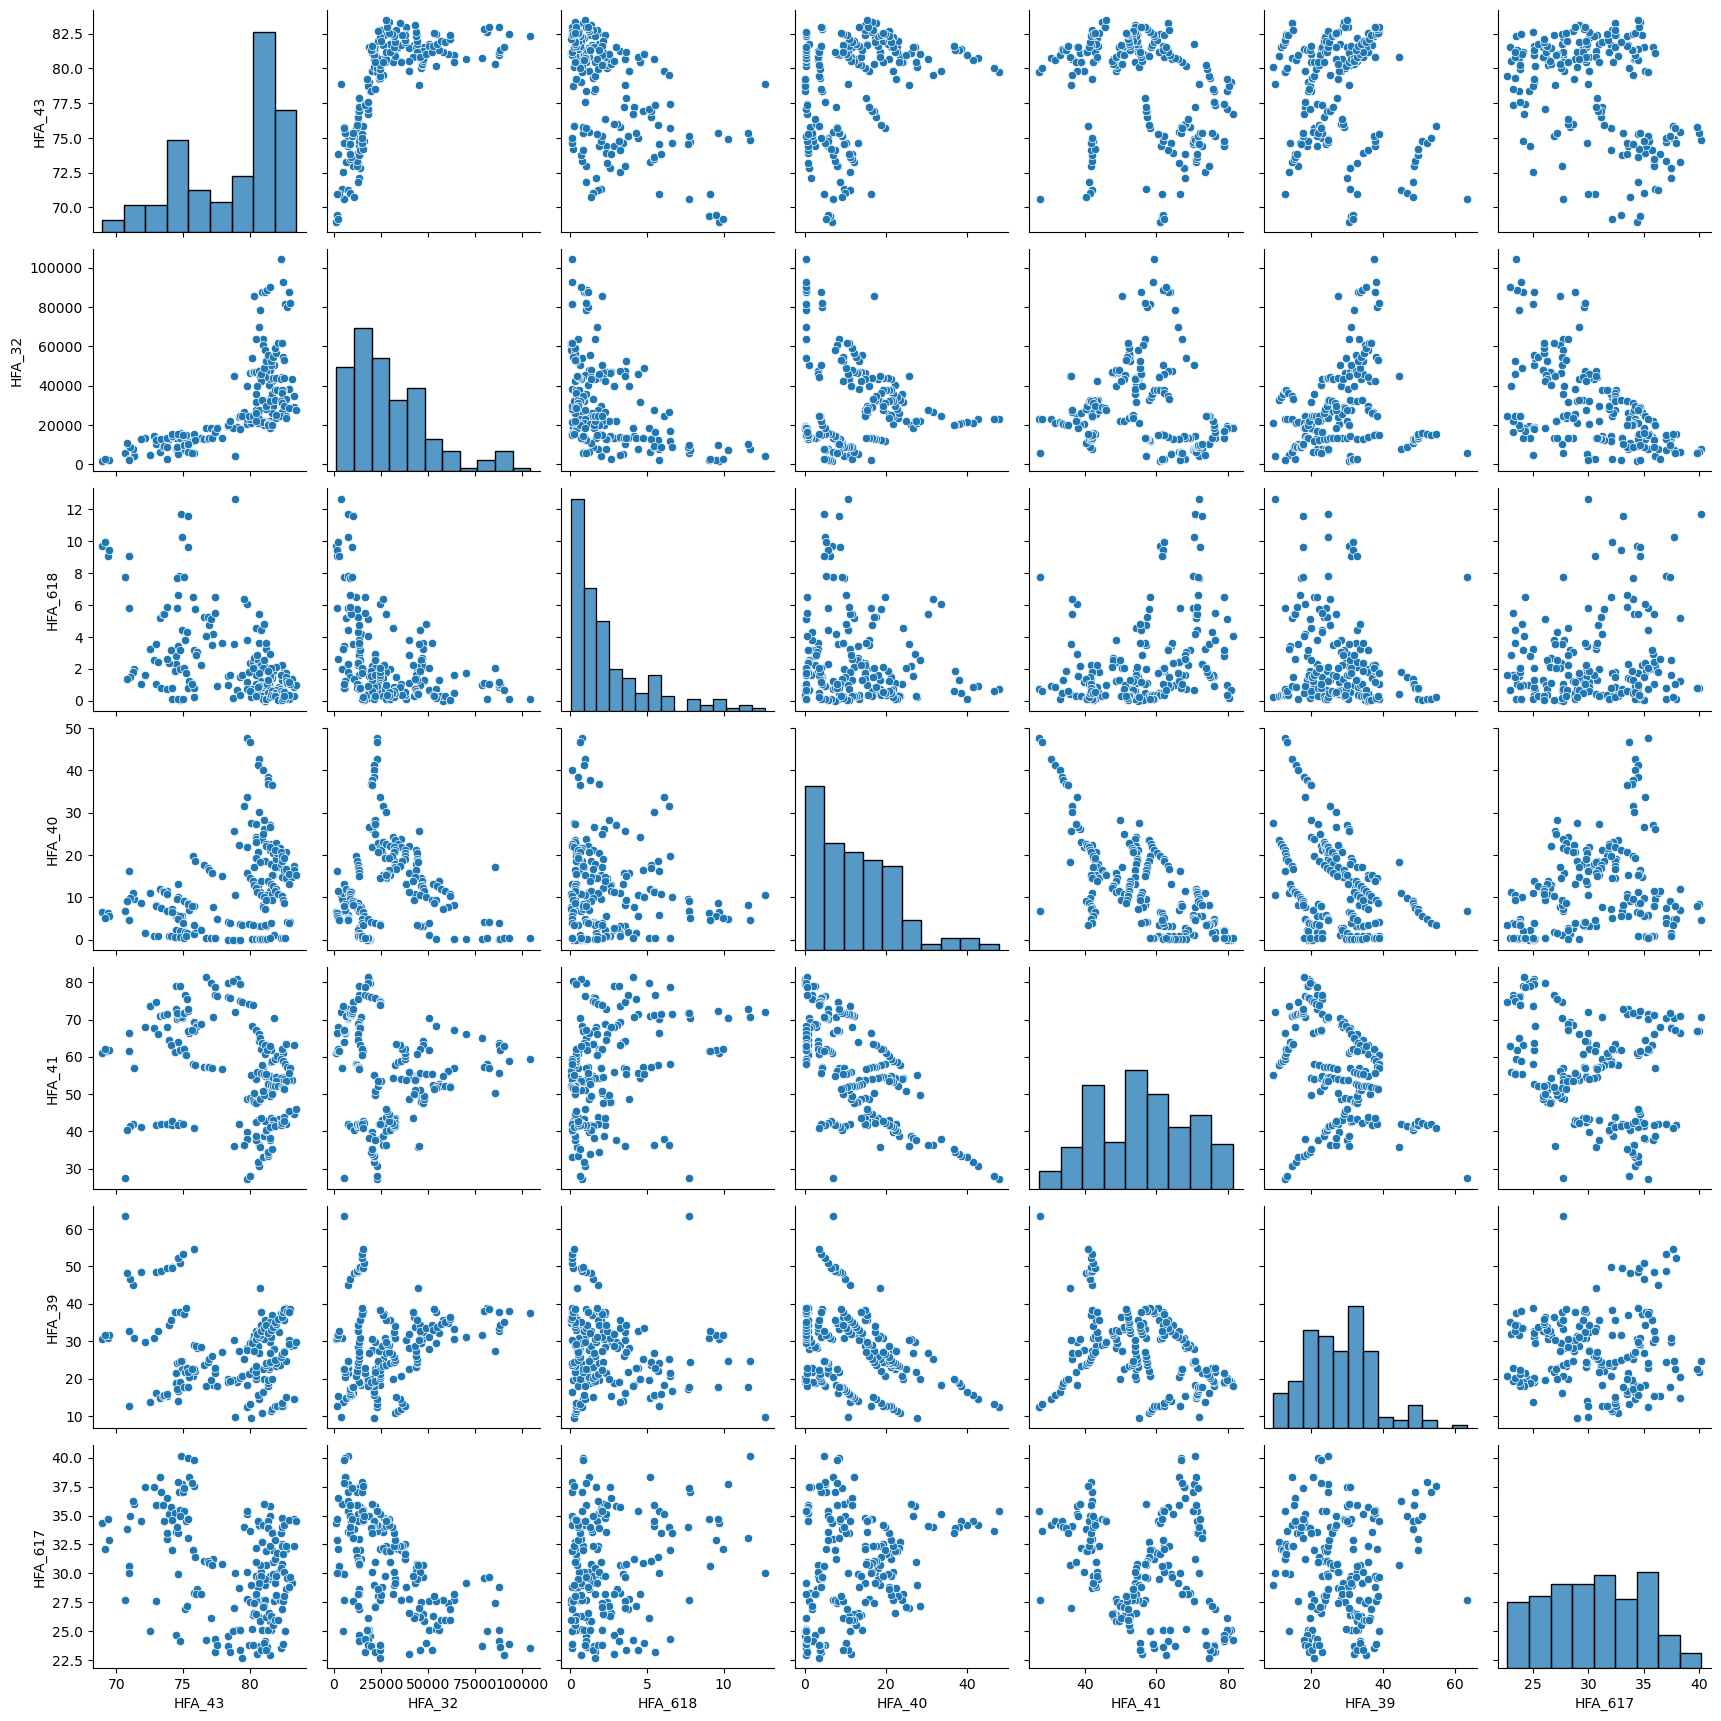

In [6]:
# looking at all variables and their relationships to sales
sns.pairplot(hfa_eduHealth_rec);

<Axes: xlabel='HFA_43', ylabel='HFA_32'>

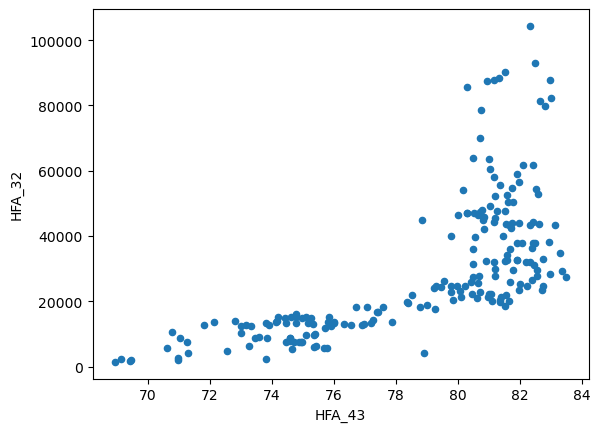

In [7]:
# We start with visualizing the relationship between life_expectancy (HFA_43) and gross national income (HFA_32) in a scatterplot
hfa_eduHealth_rec.plot(x='HFA_43', y='HFA_32', kind='scatter')

In [ ]:
### Create a dummy variable from the regions ###

In [10]:
orig_dummies = pd.get_dummies(hfa_eduHealth_rec['continent_region'], prefix='orig', drop_first=True)

In [11]:
orig_dummies

,orig_North Europe,orig_South Europe,orig_West Europe
24,0,1,0
249,0,0,1
374,0,0,0
433,0,0,1
439,0,0,1
...,...,...,...
3848,1,0,0
3851,1,0,0
3896,0,0,1
3899,0,0,1


In [15]:
# Use all explanatory variables
formula = 'HFA_43 ~  HFA_32 + HFA_618 + HFA_40 + HFA_41 + HFA_39 + HFA_617 + orig_dummies'
smf.ols(formula=formula, data=hfa_eduHealth_rec).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HFA_43   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     99.78
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           6.88e-68
Time:                        16:58:39   Log-Likelihood:                -379.51
No. Observations:                 204   AIC:                             779.0
Df Residuals:                     194   BIC:                             812.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          62.9013      5.513     11.410      0.000      52.029      73.774
HFA_32              0.0001   8.72e-06     13.659      0.000       0.000       0.000
HFA_618            -0.2236      0.061     -3.681      0.000      -0.343      -0.104
HFA_40              0.2291      0.062      3.712      0.000       0.107       0.351
HFA_41              0.1385      0.051      2.696      0.008       0.037       0.240
HFA_39              0.1400      0.056      2.517      0.013       0.030       0.250
HFA_617            -0.0813      0.035     -2.318      0.021      -0.150      -0.012
orig_dummies[0]    -1.4158      0.537     -2.636      0.009      -2.475      -0.356
orig_dummies[1]     2.9128      0.471      6.183      0.000       1.984       3.842
orig_dummies[2]     0.6713      0.529      1.269      0.206      -0.372       1.715
==============================================================================
Omnibus:                        5.888   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.580
Skew:                          -0.392   Prob(JB):                       0.0614
Kurtosis:                       3.202   Cond. No.                     1.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Getting calories, fats, proteins and alcohol from hfa_continents ####

In [ ]:
schema = 'capstone_health_education'
table = 'hfa_continents'

sql_query = f'SELECT * FROM {schema}."{table}";'
hfa_continents= sfsp.get_dataframe(sql_query)

In [ ]:
hfa_continents

### keep HFA_293 (alcohol related death rate), HFA_440 (claories), HFA_441 (fat), HFA_443 (proteins)

In [ ]:
hfa_continents = hfa_continents[['year','continent_region', 'HFA_293', 'HFA_440','HFA_441', 'HFA_443' ]]

In [ ]:
hfa_continents = hfa_continents[hfa_continents['continent_region'].isin(['South Europe','West Europe', 'East Europe', 'North Europe'])]

In [ ]:
hfa_continents.isnull().sum()

In [ ]:
hfa_continents.dropna(inplace=True)

In [ ]:
hfa_continents.info()

### Merging dataframes ###

In [ ]:
hfa_merged = pd.merge(hfa_eduHealth_rec, hfa_continents, on='year', how='inner', indicator=True)

In [ ]:
hfa_merged

In [ ]:
# We start with visualizing the relationship between life_expectancy (HFA_43) and gross national income (HFA_32) in a scatterplot
hfa_merged.plot('HFA_43', 'HFA_32', kind='scatter');

#### Getting expenditure on health from SYB health ####

In [ ]:
schema = 'capstone_health_education'
table = 'syb_expenditure_on_health_continents'

sql_query = f'SELECT * FROM {schema}."{table}";'
health_exp= sfsp.get_dataframe(sql_query)

In [ ]:
health_exp

In [ ]:
health_exp = health_exp[['year', 'continent_region', 'domestic_general_government_health_expenditure_perc_of_total_go']]

In [ ]:
health_exp.info()

In [ ]:
health_exp.isna().sum()

In [ ]:
health_exp = health_exp[health_exp['continent_region'].isin(['South Europe','West Europe', 'East Europe', 'North Europe'])]

#### Merging datasets with health expenditure ####

In [ ]:
hfa_merged_2 = pd.merge(hfa_merged, health_exp, on='year', how='inner')
hfa_merged_2

In [ ]:
hfa_merged_2.plot('HFA_43', 'HFA_32', kind='scatter');

### Getting expenditure on education from syb education ###

In [ ]:
schema = 'capstone_health_education'
table = 'syb_public_expenditure_on_education_continents'

sql_query = f'SELECT * FROM {schema}."{table}";'
edu_exp= sfsp.get_dataframe(sql_query)

In [ ]:
edu_exp

In [ ]:
edu_exp = edu_exp[['year','continent_region', 'public_expenditure_on_education_perc_of_gdp']]

In [ ]:
edu_exp = edu_exp[edu_exp['continent_region'].isin(['South Europe','West Europe', 'East Europe', 'North Europe'])]

In [ ]:
edu_exp.info()

#### Creating final data set ####

In [ ]:
hfa_eduHealth_rec.set_index('continent_region', inplace=True)
hfa_continents.set_index('continent_region', inplace=True)
health_exp.set_index('continent_region', inplace=True)
edu_exp.set_index('continent_region', inplace=True)

In [ ]:
hfa_merged = pd.merge(hfa_eduHealth_rec, hfa_continents, on='year', how='left')

In [ ]:
hfa_merged_2 = pd.merge(hfa_merged, health_exp, on='year', how='left')
hfa_merged_2

In [ ]:
merged_data = pd.merge(hfa_merged_2, edu_exp, on='year', how='inner')
merged_data

In [ ]:
merged_data.dropna(inplace=True)

In [ ]:
merged_data.sample(30)

In [ ]:
# We start with visualizing the relationship between life_expectancy (HFA_43) and gross national income (HFA_32) in a scatterplot
merged_data.plot(x='HFA_43', y='HFA_32', kind='scatter')

In [ ]:
# list of all possible explanatory continous variables
explanatory_vars = list(hfa_merged.columns)
explanatory_vars = [e for e in explanatory_vars 
                        if e not in ('continent_region')]
explanatory_vars

In [ ]:
# simple linear regression with each explanatory variable
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    formula = f"HFA_43 ~ {explanatory_var}"
    rs = smf.ols(formula=formula, data=hfa_merged).fit().rsquared
    print(f'{explanatory_var:7s} \t \t= {rs:.3}')
# income predicting life expectancy included as explanatory variable for sanity check

In [ ]:
# best R^2 for "life expectance", let's print the whole linear regression summary for income 
smf.ols(formula='HFA_43 ~ HFA_32', data=hfa_merged).fit().summary()

In [ ]:
# Use all explanatory variables
formula = 'HFA_43 ~  HFA_32 + year + HFA_618 + HFA_40 + HFA_41 + HFA_39 + HFA_617 + HFA_293 + HFA_440 + HFA_441 + HFA_443'
smf.ols(formula=formula, data=hfa_merged).fit().summary()

In [ ]:
# Remove  largest p-values from above!
model = 'HFA_43 ~  HFA_32 + HFA_618 + HFA_40 + HFA_41 + HFA_39 + HFA_617'
smf.ols(formula=model, data=hfa_merged).fit().summary()